In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as pl
import math
import scipy
#from IPython.display import Image
#sns.set(context='poster', style='darkgrid', palette='deep', font='sans-serif', font_scale=2, color_codes=True, rc=None)#sns.set()
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin, clone
from sklearn.preprocessing import RobustScaler, OneHotEncoder,StandardScaler
from sklearn.impute import SimpleImputer
pd.options.display.max_columns = None
import warnings
warnings.filterwarnings('ignore')


# Dataset
Dataset is from Kaggle - 

In [27]:
data=pd.read_excel('Data/ALF_Data.xlsx')

# Exploratory Data Analysis
1. Understanding the dataset
2. Univariate Analysis
3. Bivariate Analysis
4. Multivariate Analysis
5. Cleaning

# Feature Engineering
6. Handling Missing Values
7. Handling Outliers
8. Encoding Categorical variables
9. Feature scaling


# Handling Imbalanced Dataset

# Summary

##### Success of a machine learning algorithm depends mainly on data. It is necessary to pre-process the real-world data to make it reliable to build efficient models.
#### A. Data Cleaning & Transformation
###### Pre-processing steps:
    ➢ Handling missing data: Rows with missing values for ‘ALF’ feature are deleted. Continuous features with skewed distribution are replaced with median, nominal & ordinal features are replaced with mode.
    ➢ Feature selection: Features ‘Income’ & ‘Education’ are just having values ‘0’ or ‘1’and are not providing useful information, therefore they are removed from the data set.
    ➢ Variable Transformation: Categorical features ‘Region’, ‘Gender’ & ‘Source of Care’ are Label Encoded and One Hot Encoded to give them a numeric representation. Which is useful while using scikit learn packages.
#### B. Data Analysis
##### Inferences from Initial data analysis:
    ➢ Data set is imbalanced as label feature ‘ALF’ (‘0’- no liver failure; ‘1’- liver failure) has 464 ‘1’s and 5536 ‘0’s.
    ➢ Many features do not approximate Gaussian distribution which might be a problem for techniques like Naïve Bayes.
   
    Classifier methods assume relatively balanced distribution between the classes and this can be a problem when data is imbalanced. As the data set is small, instead of under-sampling, an oversampling technique (SMOTE) is used to treat imbalance in the data.

# Exploratory Data Analysis

## 1. Understanding the dataset

In [28]:
data.head()

,Age,Gender,Region,Weight,Height,Body Mass Index,Obesity,Waist,Maximum Blood Pressure,Minimum Blood Pressure,Good Cholesterol,Bad Cholesterol,Total Cholesterol,Dyslipidemia,PVD,Physical Activity,Education,Unmarried,Income,Source of Care,PoorVision,Alcohol Consumption,HyperTension,Family HyperTension,Diabetes,Family Diabetes,Hepatitis,Family Hepatitis,Chronic Fatigue,ALF
0,65,M,east,56.0,162.1,21.31,0.0,83.6,135.0,71.0,48.0,249.0,297.0,0,0,3.0,0.0,0.0,1.0,Governament Hospital,0.0,1,0.0,0,0.0,1,1.0,0.0,0.0,0.0
1,36,M,south,60.2,162.2,22.88,0.0,76.6,96.0,52.0,31.0,135.0,166.0,0,0,3.0,0.0,NaN,1.0,Never Counsulted,0.0,0,0.0,0,0.0,0,0.0,0.0,0.0,0.0
2,66,M,east,83.9,162.5,31.77,1.0,113.2,115.0,57.0,44.0,211.0,255.0,1,0,1.0,0.0,1.0,0.0,Never Counsulted,0.0,1,0.0,0,1.0,0,0.0,0.0,0.0,0.0
3,54,M,east,69.4,160.5,26.94,0.0,77.9,110.0,57.0,74.0,156.0,230.0,0,0,2.0,1.0,0.0,0.0,Private Hospital,0.0,1,0.0,0,0.0,0,0.0,0.0,0.0,0.0
4,63,M,north,73.1,159.2,28.84,0.0,89.3,132.0,73.0,67.0,154.0,221.0,0,0,1.0,0.0,0.0,NaN,clinic,0.0,0,1.0,0,0.0,0,0.0,0.0,0.0,0.0


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8785 entries, 0 to 8784
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     8785 non-null   int64  
 1   Gender                  8785 non-null   object 
 2   Region                  8785 non-null   object 
 3   Weight                  8591 non-null   float64
 4   Height                  8594 non-null   float64
 5   Body Mass Index         8495 non-null   float64
 6   Obesity                 8495 non-null   float64
 7   Waist                   8471 non-null   float64
 8   Maximum Blood Pressure  8481 non-null   float64
 9   Minimum Blood Pressure  8409 non-null   float64
 10  Good Cholesterol        8768 non-null   float64
 11  Bad Cholesterol         8767 non-null   float64
 12  Total Cholesterol       8769 non-null   float64
 13  Dyslipidemia            8785 non-null   int64  
 14  PVD                     8785 non-null   

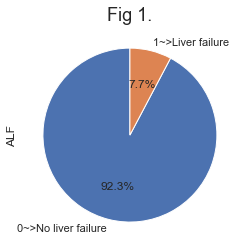

In [30]:
sns.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', color_codes=True, rc=None)
data['ALF'].value_counts(normalize=True).plot.pie(autopct='%1.1f%%',startangle=90,labels=['0~>No liver failure','1~>Liver failure'])
plt.title('Fig 1.',fontdict = {'fontsize' : 18})
plt.show()

#### Initial Observations:
1. Dataset comprises of 8785 observations and 30 variables.
2. Out of which one is dependent variable(ALF) and rest 29 are independent variables.
3. Dataset has both numerical and categorical variables.
4. Multiple variables have null/missing values.
5. Target variable "ALF" has 6000 non null observations out of 8785 total observations.
6. Fig 1 shows that:<br />
   a. Target variable/Dependent variable is categorical in nature(values: 0,1). Where, '1' indicates Liver  Failure; '0' indicates No Liver Failure.<br />
   b. Dataset is imbalanced with 7.7% of ALF values equal to '1' and 92.3% of ALF values equal to '0' 

In [31]:
#Imputing the target variable will affect the analysis.
#Lets remove all records with null values in Target variable('ALF')
data.dropna(axis=0,inplace=True,subset=['ALF'])
data['ALF']=data['ALF'].astype('int64')
print('Dataset shape after removing null/missing values from Target variable:',data.shape)

Dataset shape after removing null/missing values from Target variable: (6000, 30)


In [32]:
#dropping rows where 'Source of Care' = ' '
data.drop(data[data['Source of Care'] == ' ' ].index,inplace=True)

### Split the dataset into train and test sets
####   splitting the dataset into train and test before cleaning the dataset is necessry to avoid any data leakage. 
* Stratified split is used to get approximately the same percentage of samples of each target class in test set as the training set.

In [60]:
 X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,:-1], data.iloc[:,-1], test_size=0.3,stratify= data.iloc[:,-1], random_state=42)

In [61]:
print('Training set size = {}\nTesting set size = {}'.format(X_train.shape,X_test.shape))

Training set size = (4198, 29)
Testing set size = (1800, 29)


In [62]:
# concating X_train & y_train to continue the EDA on train set
data_train=pd.concat([X_train,y_train],axis=1)
data_test=pd.concat([X_test,y_test],axis=1)
data_train.shape, data_test.shape

((4198, 30), (1800, 30))

class OutlierImputationTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns=None):
        if isinstance(columns,list):
            self.columns = columns
        else:
            self.columns = [columns]
        self.IQR = pd.Series()
        self.lower = pd.Series()
        self.upper = pd.Series()

    def transform(self, X, **transform_params):
        # replacing the outliers
        X_cpy=X.copy()
        X_cpy[self.columns] = np.where(X[self.columns] > self.upper, self.upper, np.where(X[self.columns] < self.lower,
                                                                        self.lower, X[self.columns]))
        return X_cpy[self.columns]

    def fit(self, X, y=None, **fit_params):
        self.IQR=X[self.columns].quantile(0.75) - X[self.columns].quantile(0.25)
        self.lower=X[self.columns].quantile(0.25) - (self.IQR * 1.5)
        self.upper=X[self.columns].quantile(0.75) + (self.IQR * 1.5)
        return self

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5998 entries, 0 to 5999
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     5998 non-null   int64  
 1   Gender                  5998 non-null   object 
 2   Region                  5998 non-null   object 
 3   Weight                  5865 non-null   float64
 4   Height                  5859 non-null   float64
 5   Body Mass Index         5792 non-null   float64
 6   Obesity                 5792 non-null   float64
 7   Waist                   5783 non-null   float64
 8   Maximum Blood Pressure  5792 non-null   float64
 9   Minimum Blood Pressure  5746 non-null   float64
 10  Good Cholesterol        5990 non-null   float64
 11  Bad Cholesterol         5990 non-null   float64
 12  Total Cholesterol       5992 non-null   float64
 13  Dyslipidemia            5998 non-null   int64  
 14  PVD                     5998 non-null   

## 2. Univariate Analysis

#### Analyzing Numerical Variables

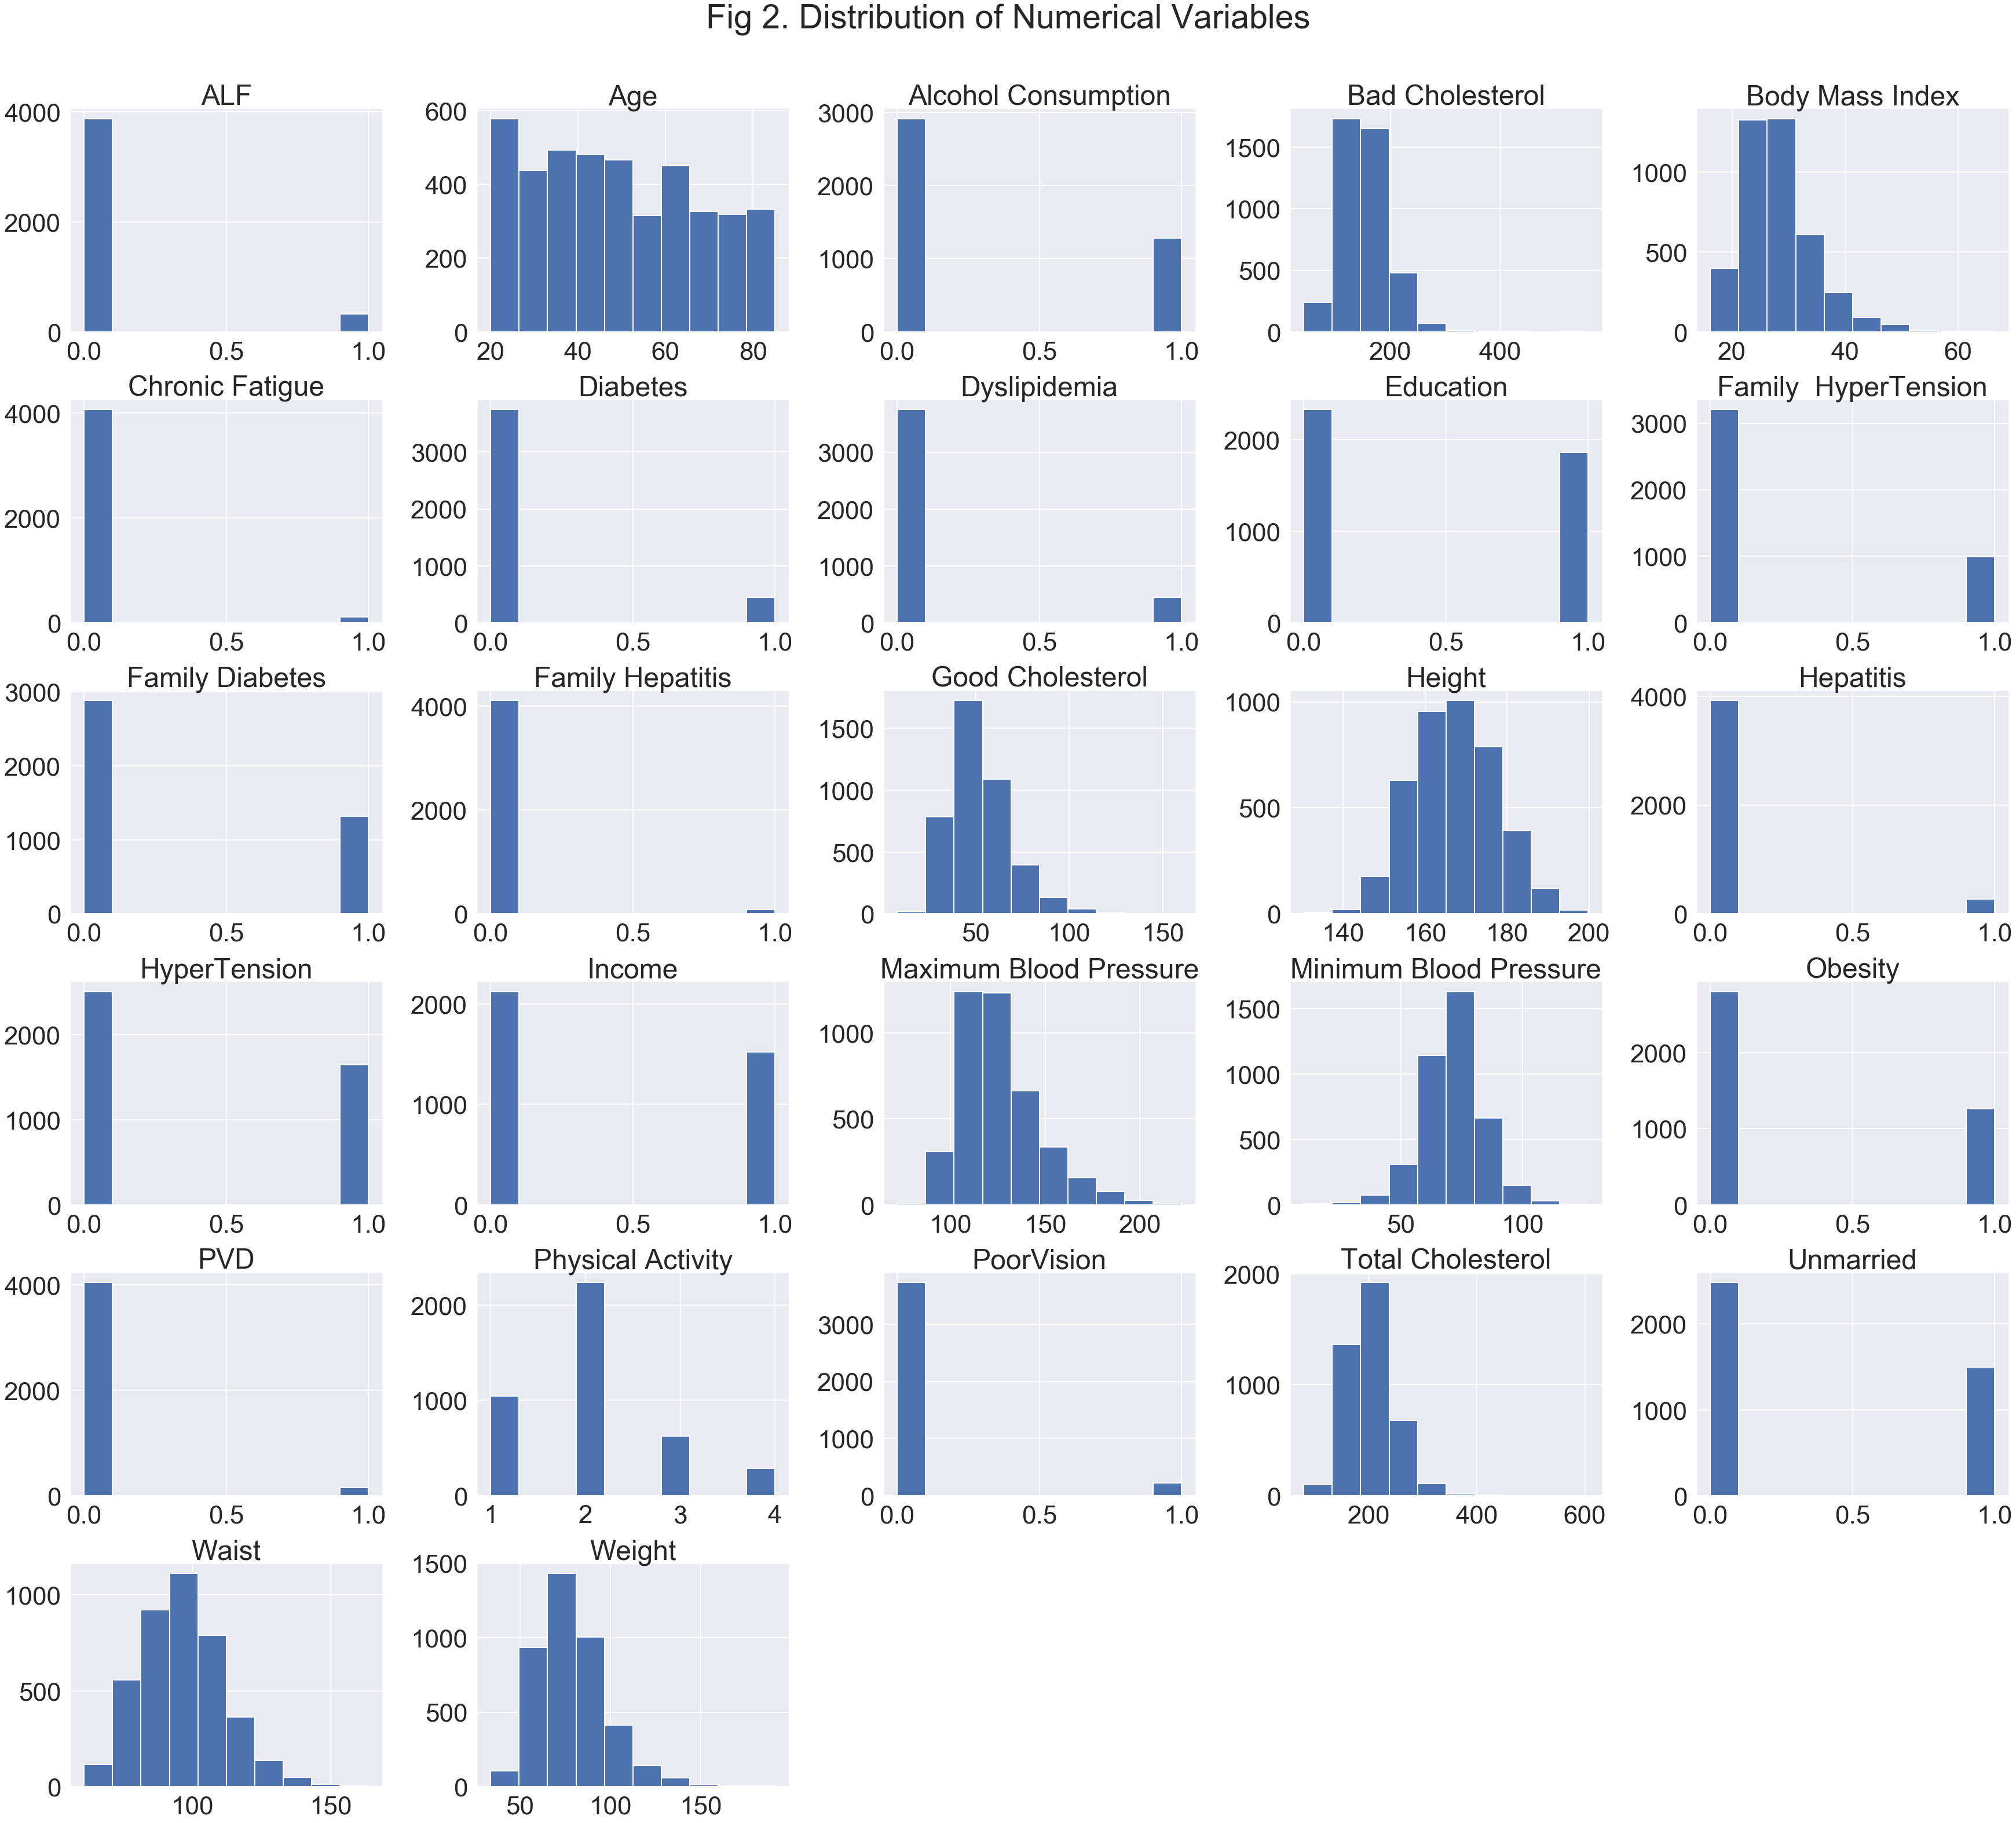

In [37]:
sns.set(context='poster', style='darkgrid', palette='deep', font='sans-serif', font_scale=2, color_codes=True, rc=None)
data_train.hist(figsize=(60,50))
pl.subplots_adjust(top=.93)
pl.suptitle("Fig 2. Distribution of Numerical Variables")
plt.show()

#### Inference from Fig 2:
1. Most of the numerical variables are discrete in nature. 
2. Continuous numerical variables have skewed distribution. Detail analysis required to identify any outliers. 

#### Detailed analysis of continuous numerical variables

In [38]:
# Variable analysis
def univariate_analysis_numeric(data,var_group):
    size=len(var_group)
    plt.figure(figsize=(5*size,12),dpi=100)
    
    for j,i in enumerate(var_group):
        des_stat= dict(data[i].describe())
        skew=data[i].skew()
        kurt=data[i].kurtosis()
        points=des_stat['mean']-des_stat['std'],des_stat['mean']+des_stat['std']
        
        plt.subplot(math.ceil(size/3),3,j+1)
        plt.subplots_adjust(top=6,bottom=3,hspace =0.5)
        sns.kdeplot(data[i],shade=True,color='LightGreen')
        sns.lineplot(points,[0,0],color='black',label='std_dev',markersize=100)
        sns.scatterplot([des_stat['min'],des_stat['max']],[0,0],color='orange',label='min/max',s=200)
        sns.scatterplot(des_stat['mean'],[0],color='red',label='mean',s=200)
        sns.scatterplot(des_stat['50%'],[0],color='blue',label='median',s=200)
        plt.xticks(fontsize=26)
        plt.yticks(fontsize=26)
        plt.xlabel('{}'.format(i),fontsize=40)
        plt.ylabel('Density',fontsize=35)
        plt.legend( prop={'size': 30})
        plt.title('std_dev={};kurtosis={};\nskew={};range={},\nmean={}; median={}'.format((round(points[0],2),
                                                                                          round(points[1],2)),
                                                                                          round(kurt,2),
                                                                                          round(skew,2),
                                                                                         (round(des_stat['min'],2),
                                                                                          round(des_stat['max'],2),
                                                                                          round(des_stat['max']-
                                                                                                des_stat['min'])),
                                                                                          round(des_stat['mean'],2),
                                                                                          round(des_stat['50%'],2)
                                                                                        ),
                                                                                         fontdict = {'fontsize' : 35})
        
        
        
    

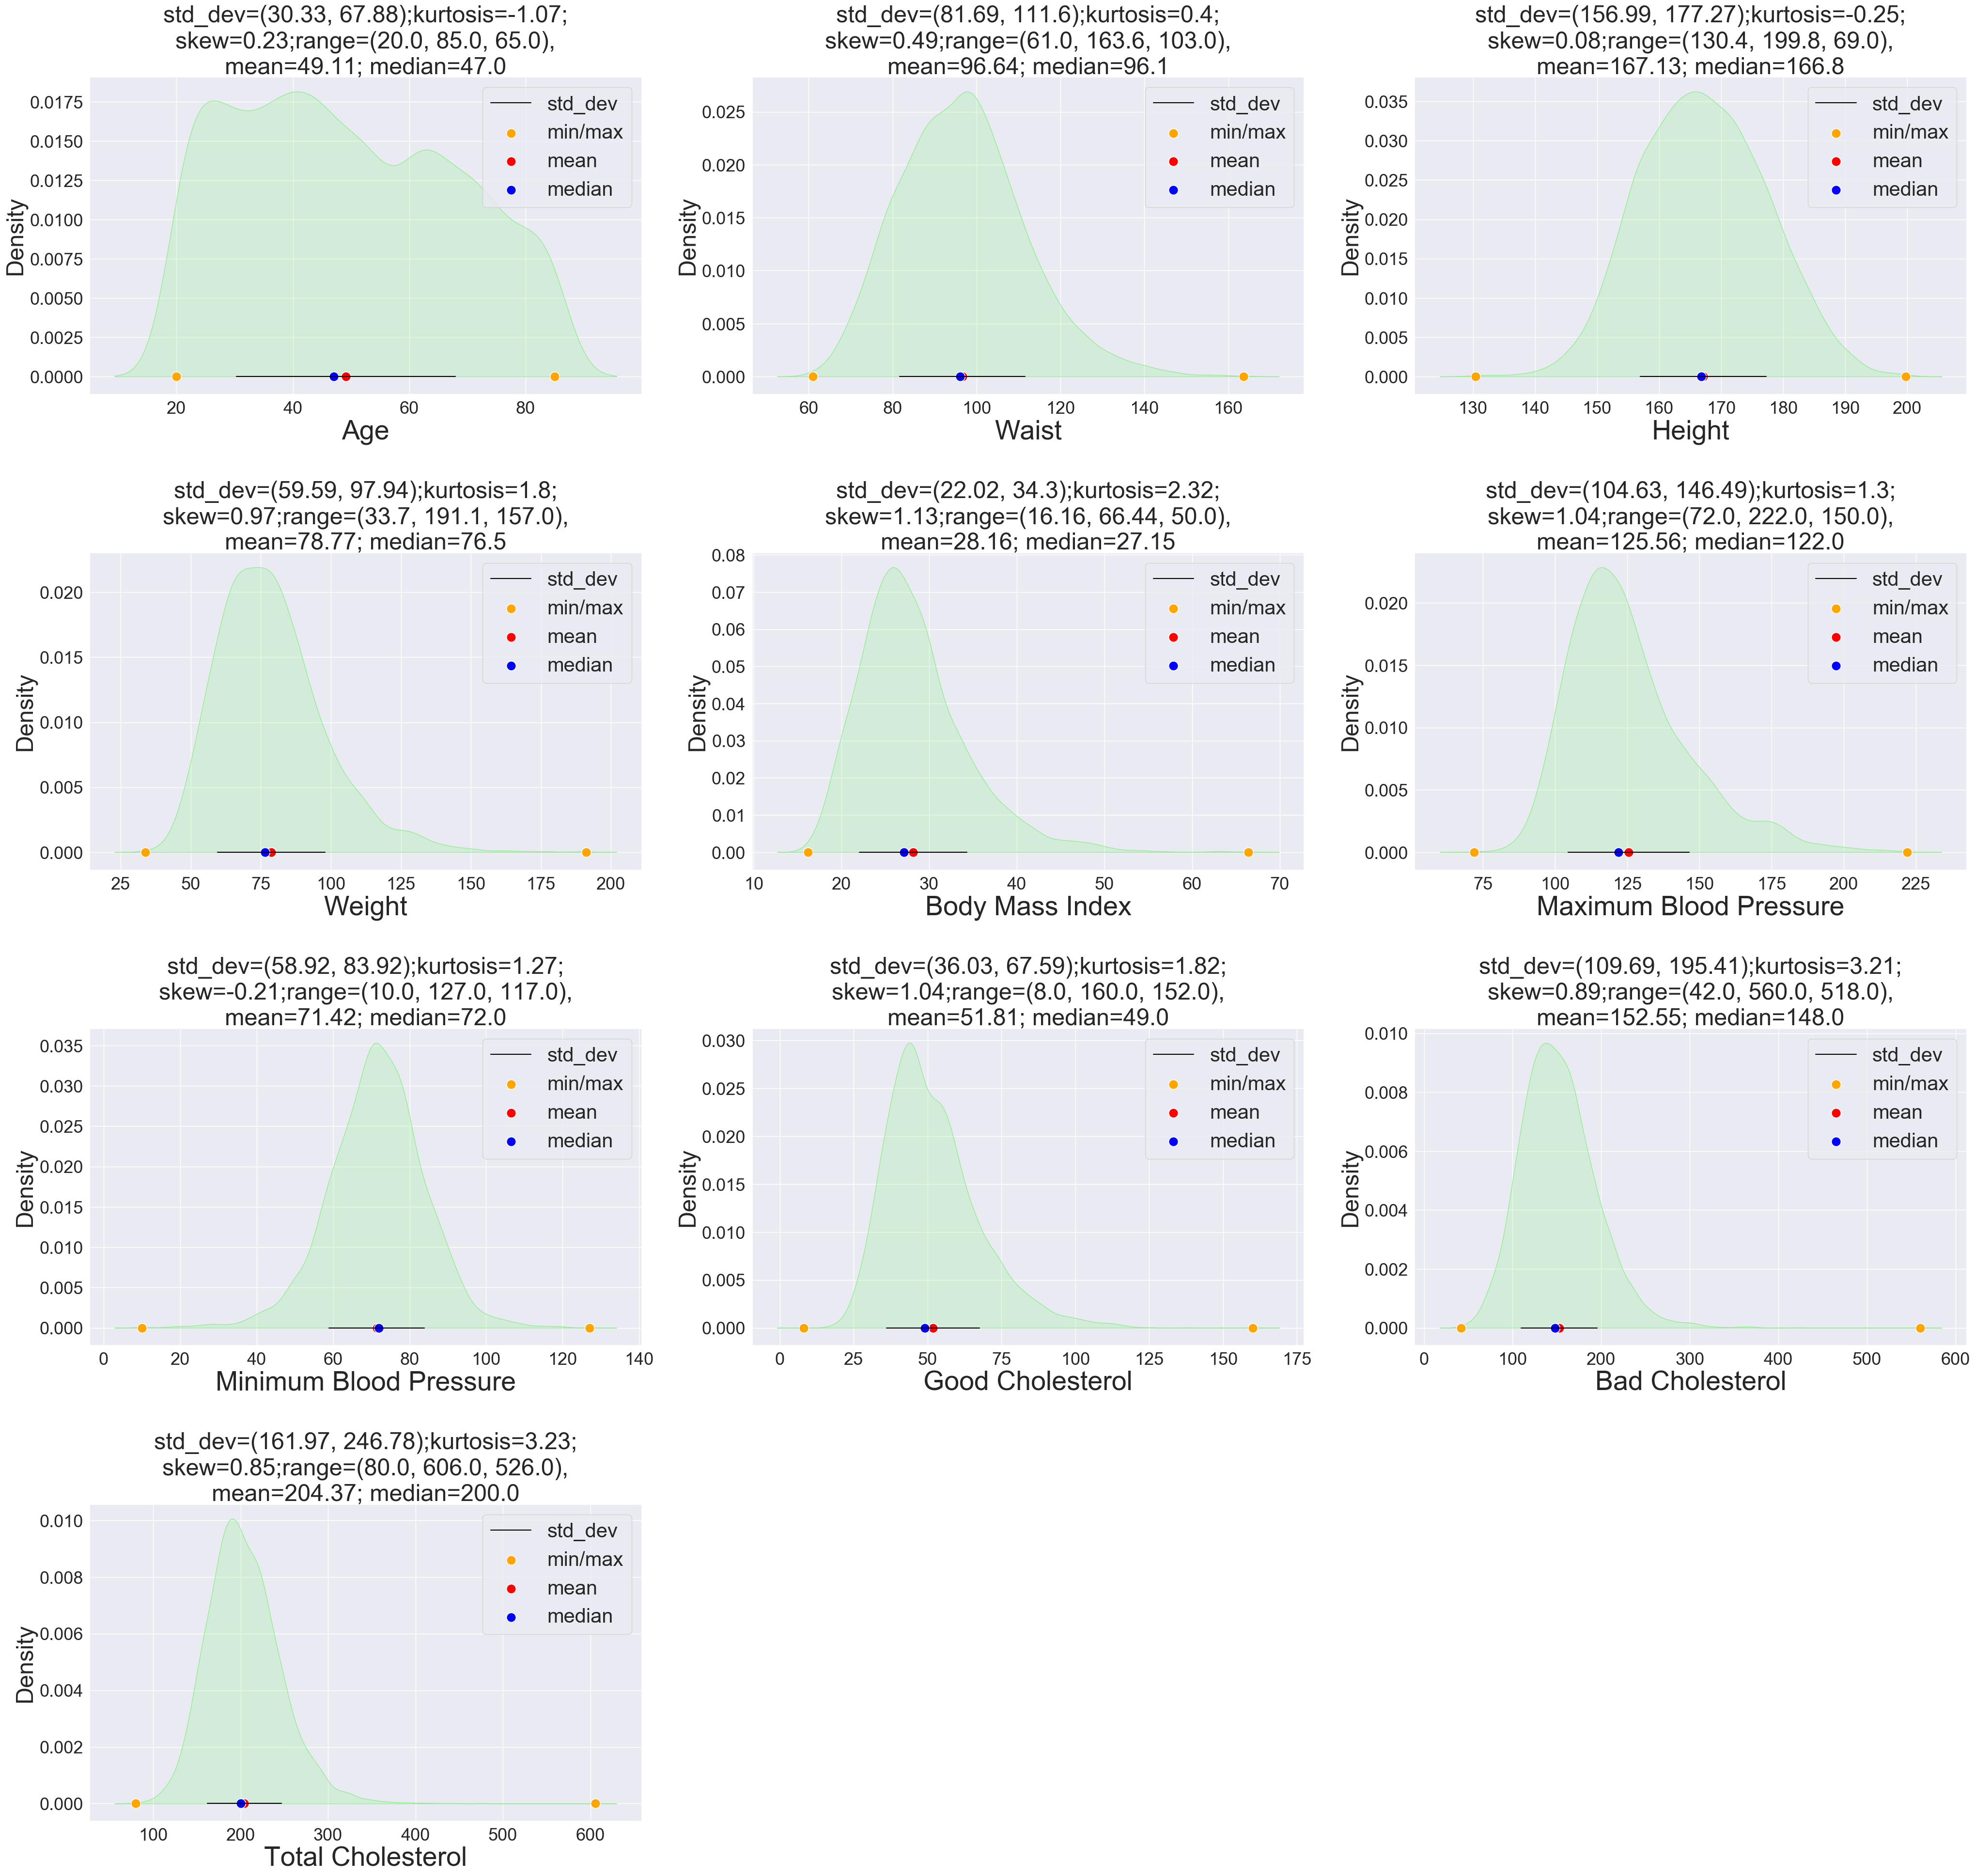

In [39]:
li=['Obesity','Dyslipidemia','PVD','Physical Activity','Education','Unmarried','Income','PoorVision','Alcohol Consumption',
   'HyperTension','Family HyperTension','Diabetes','Family Diabetes','Hepatitis','Family Hepatitis','Chronic Fatigue','ALF']
sns.set()

univariate_analysis_numeric(data_train,['Age','Waist','Height','Weight','Body Mass Index','Maximum Blood Pressure',
                        'Minimum Blood Pressure','Good Cholesterol','Bad Cholesterol','Total Cholesterol'])
#plt.suptitle("Fig 3. Density Distribution of Continuous Variables",verticalalignment='top')
plt.show()

###### Note
Skew:<br />
Any symmetric data should have a skewness near zero.<br /> 
Skew=0 normal distribution<br />
skew>0 +values indicate right skewed distribution (left tail is long relative to the right tail)<br />
skew<0 -values indicate left skewed distribution (right tail is long relative to the left tail)<br />

Fischer's Kurtosis:<br />
higher kurtosis corresponds to greater extremity of deviations (or outliers)<br />
Kurtosis=0 normal distribution<br />
kurtosis>0 +values:heavy-tailed distribution & indicates presence of outliers<br />
Kurtosis<0 -values:light-tailed distribution & indicates paucity of outliers(no or less outliers)<br />

#### Inference:
1. 'Height' & 'Age' variables have negative kurtosis and indicates paucity of outliers
2. 'Waist', 'Weight', 'Body Mass Index', 'Maximum Blood Pressure', 'Minimum Blood Pressure', 'Good Cholesterol',
    'Bad Cholesterol' & 'Total Cholesterol'  variables have positive kurtosis with either left or right skewed distributions. 
    Therefore requires outlier analysis of these variables.



#### Analyzing Categorical Variables

In [40]:
def univariate_analysis_category(data,var_group):
    size=len(var_group)
    plt.figure(figsize=(8*size,7),dpi=100)
    
    for j,i in enumerate(var_group):
        norm_count=data[i].value_counts(normalize=True)
        n_uni=data[i].nunique()
                
        plt.subplot(math.ceil(size/2),2,j+1)
        plt.subplots_adjust(top=3,bottom=1,hspace =0.7)
        graph2=sns.countplot(y=i, data = data,order=data[i].value_counts().index,palette='Set2')
        for p in graph2.patches:
            graph2.annotate(s='{:.0f}'.format(p.get_width()),xy=(p.get_width()+0.1,p.get_y()+0.5))
        plt.xticks(fontsize=15)
        plt.yticks(fontsize=15)
        plt.xlabel('fraction/percent',fontsize=25)
        plt.ylabel('{}'.format(i),fontsize=25)
        #plt.legend( prop={'size': 30})
        plt.title('n_uniques={}\nValue Counts:\n{};'.format(n_uni,norm_count),fontdict = {'fontsize' : 20})
        

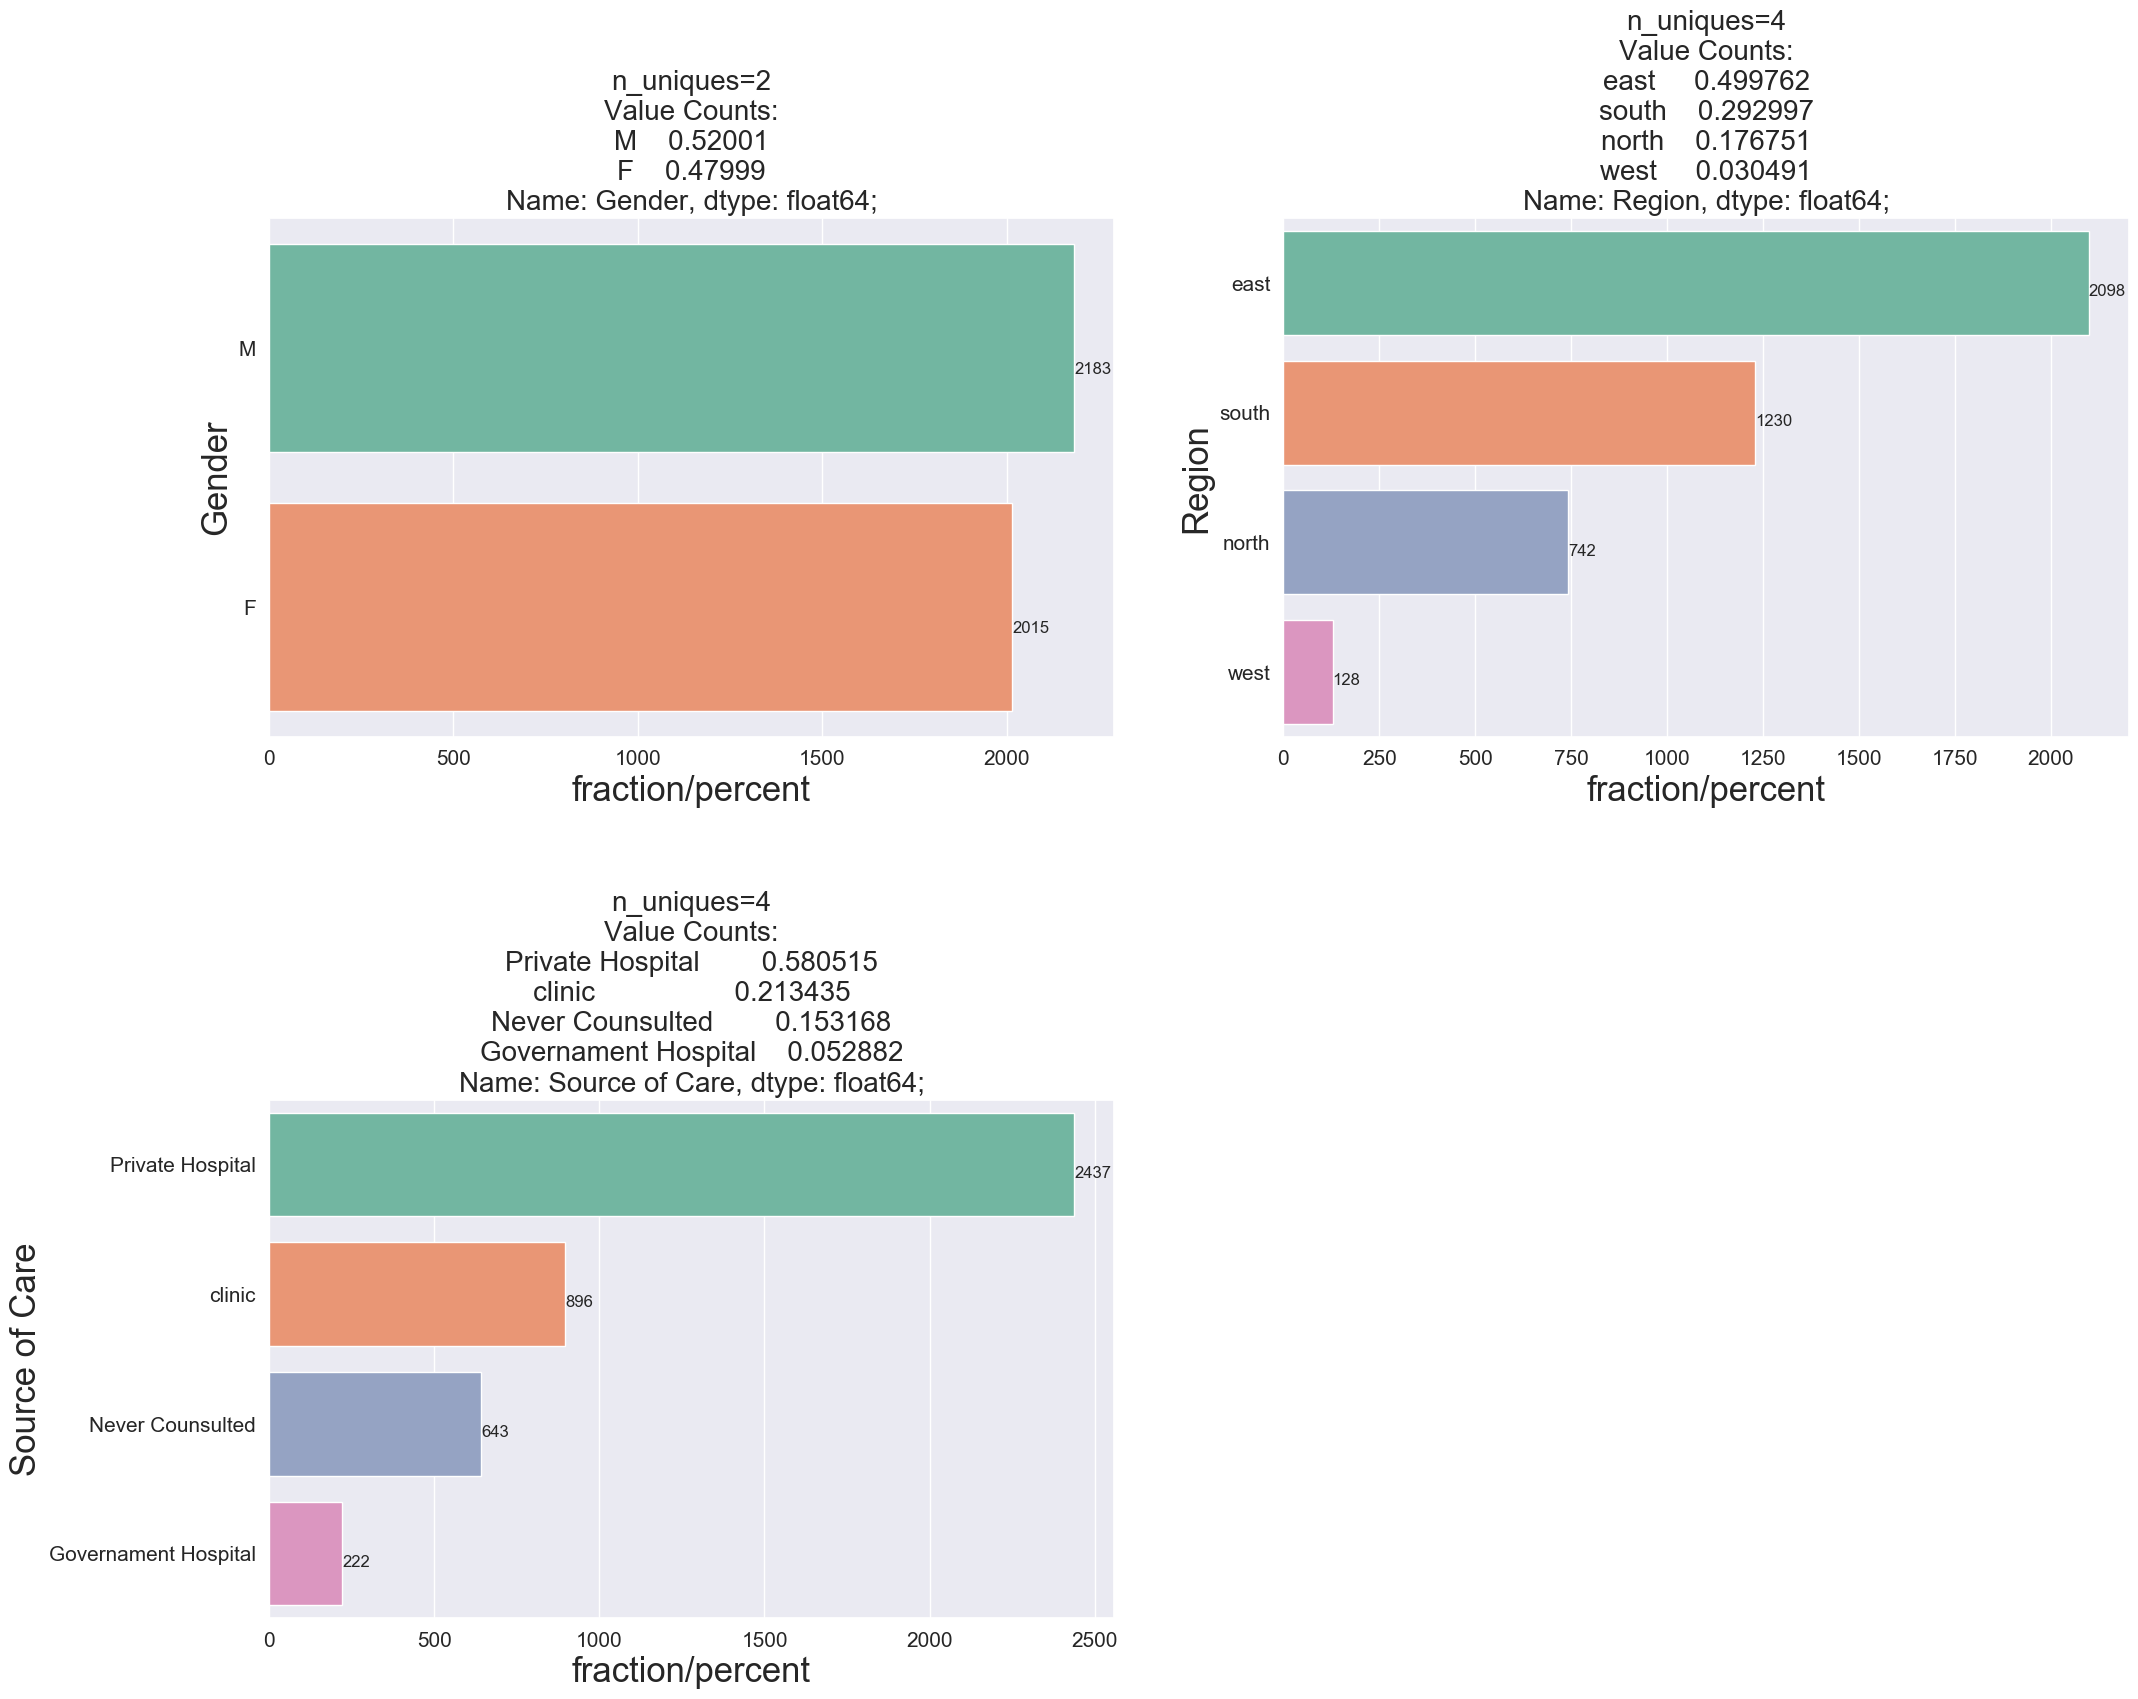

In [41]:
univariate_analysis_category(data_train,['Gender','Region','Source of Care'])

#### Inference:
1. Dataset contains more number of patient records from eastern part of the country.  

## 3. Bivariate Analysis

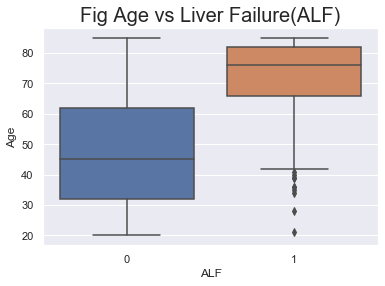

In [43]:
sns.boxplot(data_train['ALF'], data_train['Age'])
plt.title('Fig Age vs Liver Failure(ALF)',fontdict = {'fontsize' : 20})
plt.show()

#### Inference:
1. People above age 65 seems to be more likely to have liver failure.

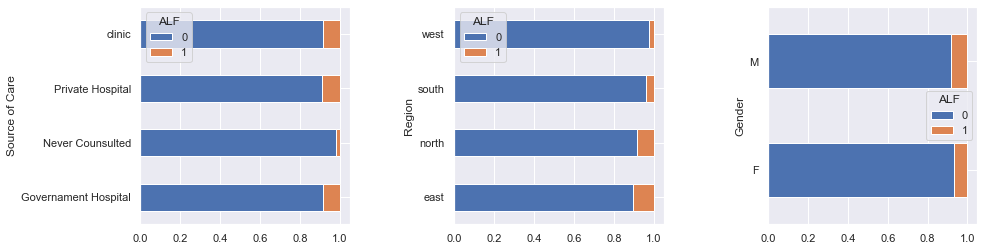

In [44]:
cat_v=['Source of Care','Region','Gender']
fig, axes = plt.subplots(nrows=1, ncols=len(cat_v))
for i,j in enumerate(cat_v):
    plt.subplots_adjust(wspace =0.5)
    pd.crosstab(index=data_train[j],columns=data_train['ALF'],normalize='index').plot(ax=axes[i], kind='barh',figsize=(15,4),stacked=True)


#### Inference:
1. type of care
2. Region
3. Both male & female are prone to liver failure

## 4. Multivariate Analysis

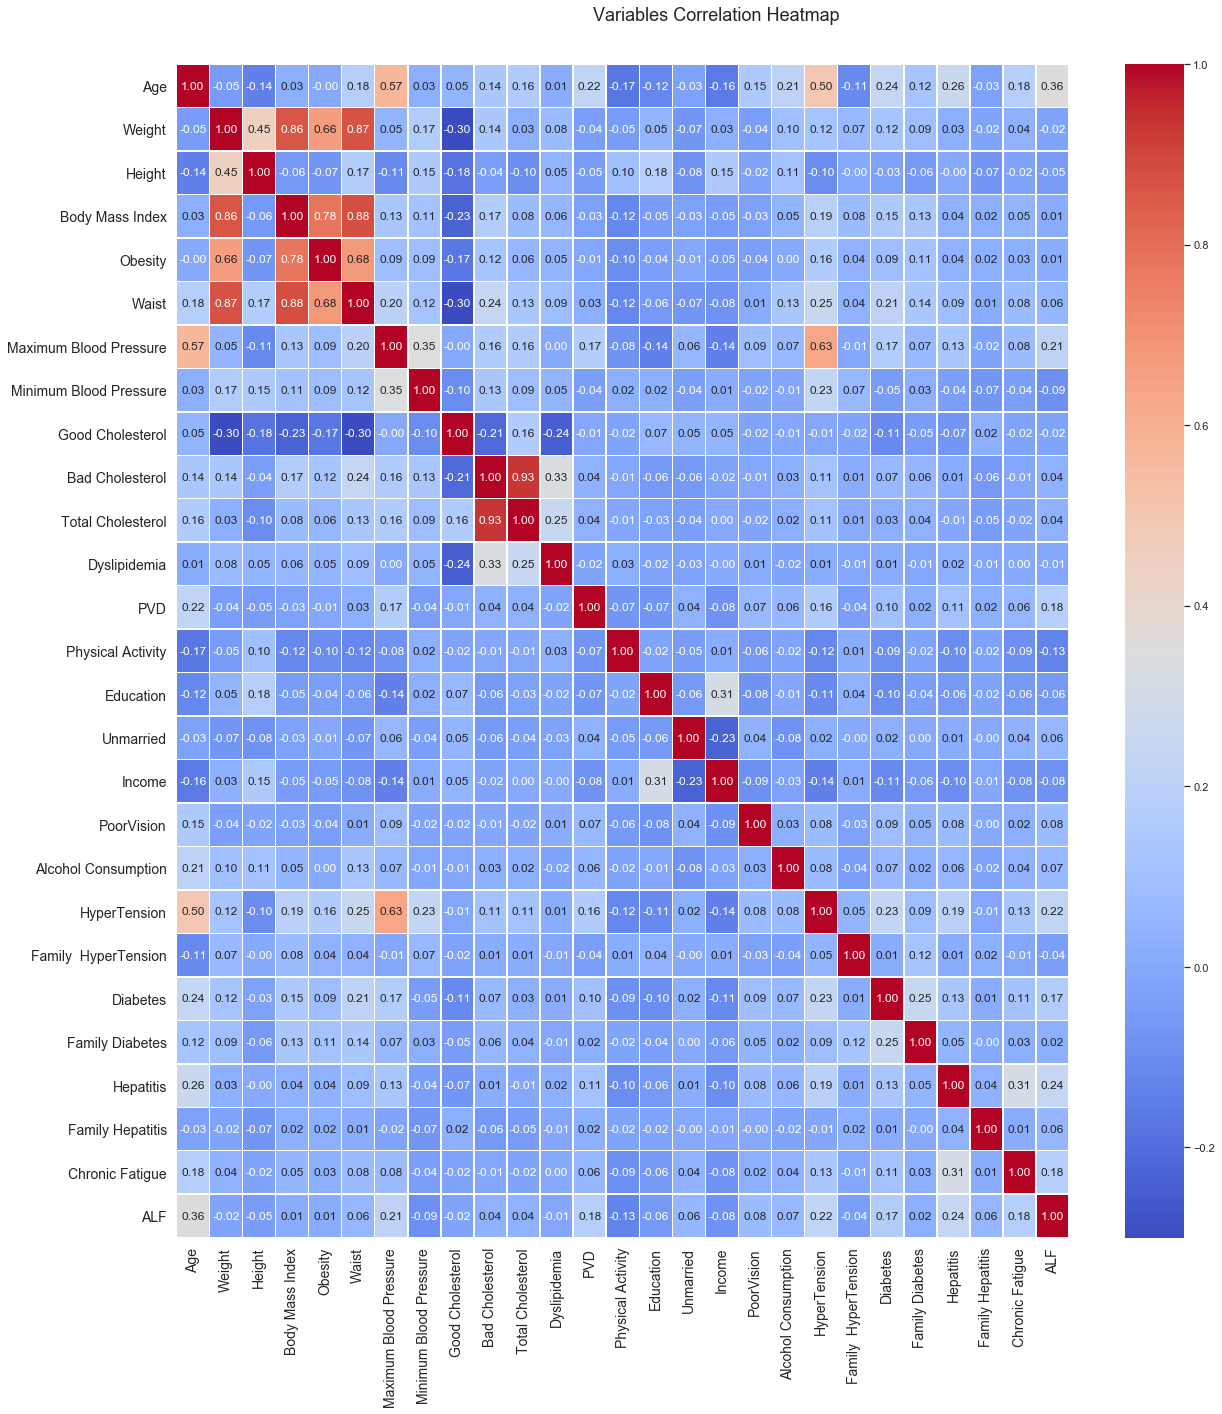

In [45]:
f, ax = plt.subplots(figsize=(20, 20))
sns.set()
corr = data_train.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',linewidths=.5)
f.subplots_adjust(top=.94)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
t= f.suptitle('Variables Correlation Heatmap', fontsize=18)

#### Inference:
1. 'Weight','Waist','Body Mass Index' & 'Obesity' variables are showing high correletaion with each other
2. Similarly 'Bad Cholesterol' & 'Total Cholesterol' are highly correlated 

## 5. Cleaning

Based on the above analysis we can infer following things:

1. 'Body Mass Index', 'Obesity' & 'Total Cholesterol' are defined based on other existing features i.e.<br />
     * Body Mass Index= (weight (kg) / height (cm) / height (cm)) x 10,000<br />
     * Obesity=1 if BMI>30, Obesity=0 if BMI<=30<br />
     * Total Cholesterol=Good Cholesterol+Bad Cholesterol<br />
   Also, these features are correlated with their base features.Therefore they can be dropped.<br />
    <br />
    
2. Features 'Income' & 'Education' are having values just ‘0’ or ‘1’ and are not providing useful information, therefore they      can be removed from the data set.

   <br />
3. In 'Source of Care' feature, observation/row with unnamed category is deleted.


In [64]:
# Cleaning
for dataset in [data_train, data_test]:
    dataset.drop(['Body Mass Index', 'Obesity', 'Total Cholesterol','Income','Education'], axis=1, inplace=True)
    dataset.drop(dataset[dataset['Source of Care'] == ' ' ].index ,inplace=True)
               

# Feature Engineering

## 6. Handling Missing values
#### Checking for variables with Null/Missing values

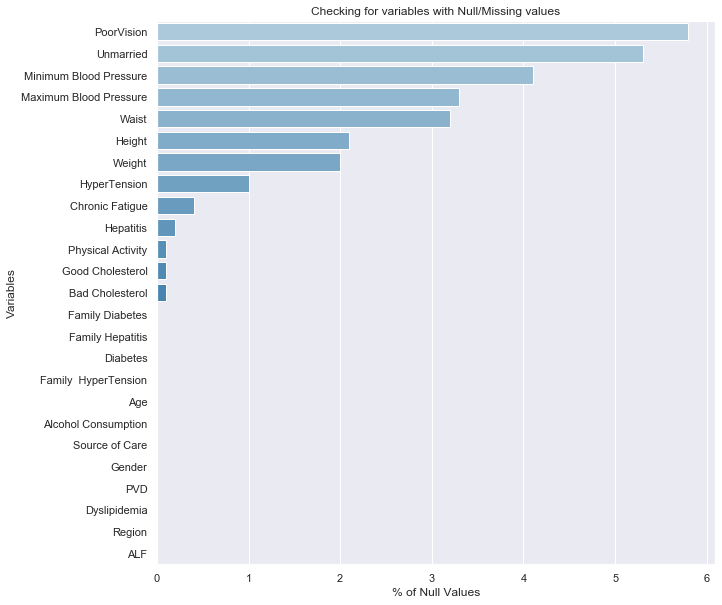

In [65]:
null_values=pd.DataFrame({'cols':data_train.isnull().sum().index,'vals':np.round(data_train.isnull().sum().values/ len(data_train) * 100,1)})
null_values.sort_values(by='vals',ascending=False,inplace=True)

fig, ax = plt.subplots(figsize=(10,10))
sns.set()
sns.barplot(x='vals',y='cols',data=null_values,orient="h",palette="Blues_d")#Blues_d,rocket,vlag,deep
ax.set_xlabel('% of Null Values')
ax.set_ylabel('Variables')
ax.set_title('Checking for variables with Null/Missing values')
#fig.suptitle('Checking for columns with Null/Missing values')
plt.show()

#### Handling Missing Values
![title](missingvaluetable.jpg)

In [67]:
#continuous numeric features that have skewed distribution are imputed using median
median_=['Height','Weight','Waist','Minimum Blood Pressure','Maximum Blood Pressure','Good Cholesterol','Bad Cholesterol']
#data_train[median]=data_train[median].fillna(value=data_train[median].median())#, inplace=True
for i in ['Height','Weight','Waist','Minimum Blood Pressure','Maximum Blood Pressure','Good Cholesterol','Bad Cholesterol']: 
    data_train[i].fillna(value=data_train[i].median(), inplace=True)

# continuous numeric features with normal distribution are imputed using mean
#dataset['Height'].fillna(value=dataset['Height'].mean(), inplace=True)

# Nominal features are imputed using mode 
mode_=['Unmarried','Chronic Fatigue','Family Hepatitis','Hepatitis','Diabetes','HyperTension','PoorVision',
              'Physical Activity']
#data_train[mode]=data_train[mode].fillna(value=data_train[mode].mode())#, inplace=True
for i in ['Unmarried','Chronic Fatigue','Family Hepatitis','Hepatitis','Diabetes','HyperTension','PoorVision',
              'Physical Activity']:
    data_train[i].fillna(value=data_train[i].mode()[0], inplace=True)

"""
Imputing 'Total Cholesterol'
Total Cholesterol= Good Cholesterol + Bad Cholesterol
Missing values in this field can be imputed based on above formula
data_train['Total Cholesterol'] = data_train.apply(lambda row: row['Good Cholesterol']+row['Bad Cholesterol']
                                       if np.isnan(row['Total Cholesterol']) else row['Total Cholesterol'],axis=1)
imputing Obesity column 
Null values in 'Obesity' variable is due to null values in 'Body Mass Index' variable
If BMI >30 then the person is Obese. So Obesity column is dependent on BMI column & can be imputed based on it.
Null values in 'Body Mass Index' variable is imputed with its median (27.28) which is less than 30 therefore not Obese or 0 is
the imputation value for 'Obesity' variable.
data_train['Obesity'].fillna(value=0, inplace=True)
"""


#### Verifying if all the Null/Missing values are handled 

In [68]:
data_train.isnull().sum()

Age                       0
Gender                    0
Region                    0
Weight                    0
Height                    0
Waist                     0
Maximum Blood Pressure    0
Minimum Blood Pressure    0
Good Cholesterol          0
Bad Cholesterol           0
Dyslipidemia              0
PVD                       0
Physical Activity         0
Unmarried                 0
Source of Care            0
PoorVision                0
Alcohol Consumption       0
HyperTension              0
Family  HyperTension      0
Diabetes                  0
Family Diabetes           0
Hepatitis                 0
Family Hepatitis          0
Chronic Fatigue           0
ALF                       0
dtype: int64

In [69]:
data_train.shape,data_test.shape

((4198, 25), (1800, 25))

##  7. Handling Outliers
#### Checking for variables with outliers

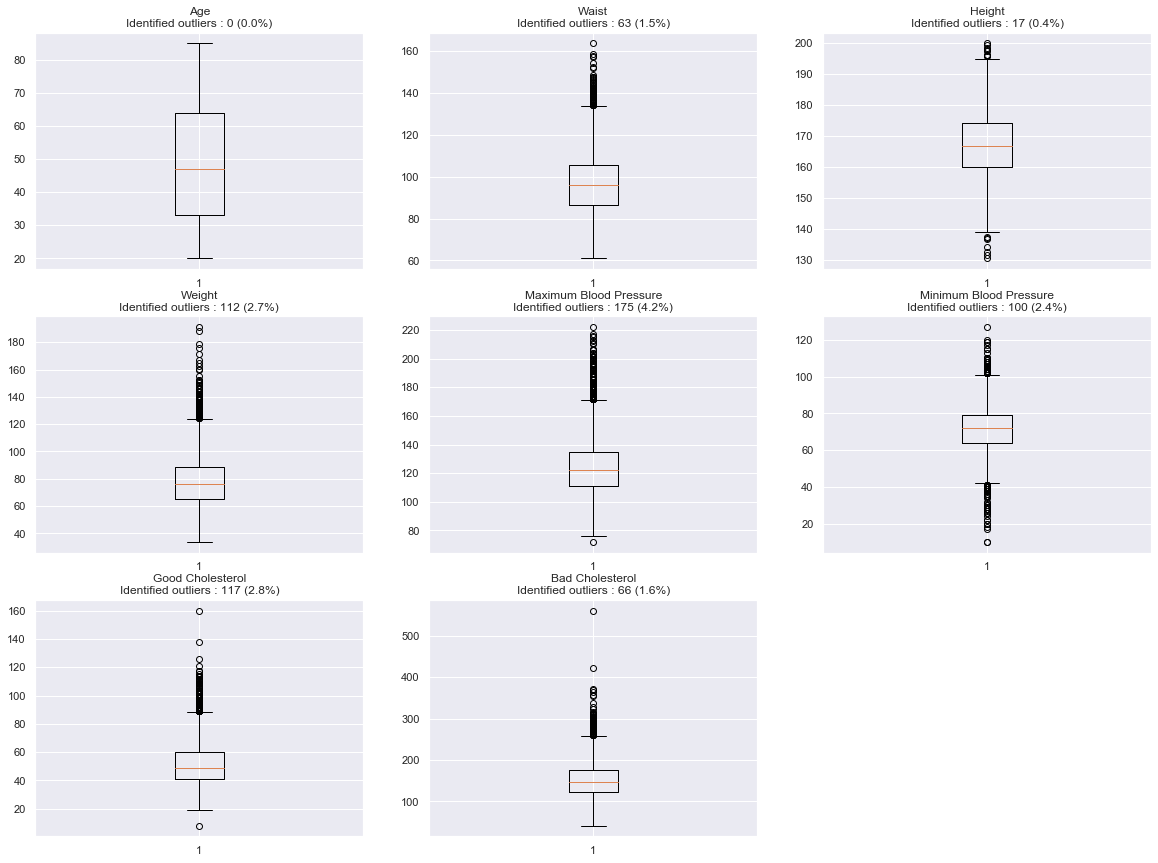

In [70]:
plt.figure(figsize=(20,20))

for i,variable in enumerate(['Age','Waist','Height','Weight','Maximum Blood Pressure',
                        'Minimum Blood Pressure','Good Cholesterol','Bad Cholesterol']):
    #print(i,var)
    #calculate the IQR
    IQR = data_train[variable].quantile(0.75) - data_train[variable].quantile(0.25)
    
    #calculate the boundries
    lower = data_train[variable].quantile(0.25) - (IQR * 1.5)
    upper = data_train[variable].quantile(0.75) + (IQR * 1.5)
    #print('{}:lower={},upper={}'.format(variable,round(lower,2),round(upper,2)))
    outliers = [x for x in data_train[variable] if x < lower or x > upper]
    percent=(len(outliers)/data_train[variable].shape[0])*100
    #print('Identified outliers for {}: {}({}%))'.format(variable,len(outliers),round(percent,1)))
    plt.subplot(4,3,i+1)
    plt.boxplot(data_train[variable])
    plt.title('{}\nIdentified outliers : {} ({}%)'.format(variable,len(outliers),round(percent,1)))

plt.show()

In [71]:
data_train[['Age','Waist','Height','Weight','Maximum Blood Pressure','Minimum Blood Pressure','Good Cholesterol',
        'Bad Cholesterol']].describe()

,Age,Waist,Height,Weight,Maximum Blood Pressure,Minimum Blood Pressure,Good Cholesterol,Bad Cholesterol
count,4198.000000,4198.000000,4198.00000,4198.000000,4198.000000,4198.000000,4198.000000,4198.000000
mean,49.107432,96.625869,167.12394,78.721629,125.440448,71.442830,51.808718,152.545260
std,18.775885,14.712676,10.03178,18.982528,20.591889,12.243283,15.773726,42.834335
min,20.000000,61.000000,130.40000,33.700000,72.000000,10.000000,8.000000,42.000000
25%,33.000000,86.300000,160.00000,65.300000,111.000000,64.000000,41.000000,123.000000
50%,47.000000,96.100000,166.80000,76.500000,122.000000,72.000000,49.000000,148.000000
75%,64.000000,105.375000,174.07500,88.800000,135.000000,79.000000,60.000000,177.000000
max,85.000000,163.600000,199.80000,191.100000,222.000000,127.000000,160.000000,560.000000


In [72]:
%%html
<style>
  table {margin-left: 0 !important;}
</style>

Overweight (not obese), if BMI is 25.0 to 29.9
Class 1 (low-risk) obesity, if BMI is 30.0 to 34.9
Class 2 (moderate-risk) obesity, if BMI is 35.0 to 39.9
Class 3 (high-risk) obesity, if BMI is equal to or greater than 40.0

Waist Size
Women with a waist size greater than 35 inches (89 centimeters) and men with a waist size greater than 40 inches (102 centimeters) have an increased risk for heart disease and type 2 diabetes. People with "apple-shaped" bodies (waist is bigger than the hips) also have an increased risk for these conditions.

Blood Pressure:

| Category       | MaxBP        | MinBP        |
| :------------- | :----------: | -----------: |
|  Normal        | < 120   | < 80    |
|  Elevated      | 120-129   | < 80    |
|HighBP(Stage 1) | 130-139   | 80-89    |
|HighBP(Stage 2)    | >= 140   | >= 90    |
|Highpertensive crisis| > 180 | > 120    |

reference: https://www.heart.org/en/health-topics/high-blood-pressure/understanding-blood-pressure-readings

#### Inference:

#### Handling outliers

In [73]:
for variable in ['Height','Weight','Waist','Minimum Blood Pressure','Maximum Blood Pressure','Good Cholesterol',
                 'Bad Cholesterol']:
    #calculate the IQR
    IQR = data_train[variable].quantile(0.75) - data_train[variable].quantile(0.25)

    #calculate the boundries
    lower = data_train[variable].quantile(0.25) - (IQR * 1.5)
    upper = data_train[variable].quantile(0.75) + (IQR * 1.5)

    outliers = [x for x in data_train[variable] if x < lower or x > upper]
    percent=(len(outliers)/data_train[variable].shape[0])*100
    print('Identified outliers for {}: {}({}%))'.format(variable,len(outliers),round(percent,1)))

    # replacing the outliers
    data_train[variable] = np.where(data_train[variable] > upper, upper, np.where(data_train[variable] < lower, lower, data_train[variable]))

    outliers = [x for x in data_train[variable] if x < lower or x > upper]
    percent=(len(outliers)/data_train[variable].shape[0])*100
    print('After outlier treatment for {}: {}({}%))\n'.format(variable,len(outliers),round(percent,1)))

Identified outliers for Height: 17(0.4%))
After outlier treatment for Height: 0(0.0%))

Identified outliers for Weight: 112(2.7%))
After outlier treatment for Weight: 0(0.0%))

Identified outliers for Waist: 63(1.5%))
After outlier treatment for Waist: 0(0.0%))

Identified outliers for Minimum Blood Pressure: 100(2.4%))
After outlier treatment for Minimum Blood Pressure: 0(0.0%))

Identified outliers for Maximum Blood Pressure: 175(4.2%))
After outlier treatment for Maximum Blood Pressure: 0(0.0%))

Identified outliers for Good Cholesterol: 117(2.8%))
After outlier treatment for Good Cholesterol: 0(0.0%))

Identified outliers for Bad Cholesterol: 66(1.6%))
After outlier treatment for Bad Cholesterol: 0(0.0%))



In [ ]:
""""
BMI=[weight (kg) / height (cm) / height (cm)] x 10,000
data_t['Body Mass Index'] = data_t.apply(lambda row: round((row['Weight']/row['Height']/row['Height'])*10000,2),axis=1) 
data_t['Total Cholesterol'] = data_t.apply(lambda row: row['Good Cholesterol']+row['Bad Cholesterol'],axis=1)
"""

#### Inference:
Here outliers are capped using Inter-quantal range proximity rule(i.e. boundaries are determined using IQR proximity rules)

In [74]:
data_train.shape,data_test.shape

((4198, 25), (1800, 25))

## 8. Encoding Categorical Variables

In [75]:
data_train.head()

,Age,Gender,Region,Weight,Height,Waist,Maximum Blood Pressure,Minimum Blood Pressure,Good Cholesterol,Bad Cholesterol,Dyslipidemia,PVD,Physical Activity,Unmarried,Source of Care,PoorVision,Alcohol Consumption,HyperTension,Family HyperTension,Diabetes,Family Diabetes,Hepatitis,Family Hepatitis,Chronic Fatigue,ALF
452,43,F,north,72.6,180.9,77.2,144.0,95.0,47.0,98.0,0,0,1.0,1.0,clinic,0.0,0,1.0,0,0.0,0,0.0,0.0,0.0,0
61,22,F,east,99.2,183.2,111.0,131.0,78.0,31.0,142.0,0,0,2.0,0.0,Private Hospital,0.0,0,0.0,0,0.0,0,0.0,0.0,0.0,0
1583,64,F,south,78.3,172.9,94.3,131.0,68.0,36.0,148.0,0,0,2.0,0.0,clinic,0.0,1,0.0,0,1.0,1,0.0,0.0,0.0,0
3457,29,F,south,75.5,178.9,84.2,102.0,69.0,43.0,189.0,0,0,2.0,0.0,Private Hospital,0.0,1,0.0,0,0.0,0,0.0,0.0,0.0,0
1021,71,M,south,79.3,147.4,114.4,154.0,72.0,36.0,149.0,0,0,1.0,0.0,Private Hospital,0.0,0,1.0,0,0.0,1,0.0,0.0,0.0,0


In [76]:
data_train_OHE=pd.get_dummies(data_train.iloc[:,:-1], columns=['Gender','Region', 'Source of Care'],
                    prefix=['Gender','Region', 'Source of Care'],dtype='int64',drop_first=False)

In [77]:
data_train_OHE['ALF']=data_train.iloc[:,-1]

In [78]:
data_train_OHE.shape

(4198, 32)

## 9. Feature Scaling

# Handling Imbalanced Dataset

# Summary

In [ ]:
"""
Putting all the data cleaning and processing steps together in pipeline
create a transformation pipeline(impute missing data,standardize,perform feature engineering,dimensionality reduction,etc.)
on training set and when a new observation comes (we should treat test set as just a new observations that are unavailable during training)
apply this pipeline transformations on the new(test) data.
"""

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler, OneHotEncoder

#create sklearn Pipeline
# Select columns transformer-(custom)
#Imoute transformer (custom)
# outlier transformer (custom)
# num_transformer- impute,outlier removal, scaling
# cat_transformer- impute, one hot encoding, scaling
# SMOTE imblearn transformer
# classifier

In [11]:
class SelectColumnsTransfomer(BaseEstimator, TransformerMixin):

    def __init__(self, columns=None):
        if isinstance(columns,list):
            self.columns = columns
        else:
            self.columns = [columns]

    def transform(self, X, **transform_params):
        trans = X[self.columns].copy() 
        return trans

    def fit(self, X, y=None, **fit_params):
         return self
        
#-------------------------------------------------------------------------------------------------------------------       
class DataFrameFeatureUnion(BaseEstimator, TransformerMixin):
    """ A DataFrame transformer that unites several DataFrame transformers
    
    Fit several DataFrame transformers and provides a concatenated
    Data Frame
    
    Parameters
    ----------
    list_of_transformers : list of DataFrameTransformers
        
    """ 
    def __init__(self, list_of_transformers):
        self.list_of_transformers = list_of_transformers
        
    def transform(self, X, **transformparamn):
        """ Applies the fitted transformers on a DataFrame
        
        Parameters
        ----------
        X : pandas DataFrame
        
        Returns
        ----------
        concatted :  pandas DataFrame
        
        """
        
        """
        sometimes when you perform several operations on a single dataframe object, 
        the index persists in the memory. So using df.reset_index() will solve the problem of extra rows during pd.concat.
        """
        concatted = pd.concat([transformer.transform(X).reset_index(drop=True)
                            for transformer in
                            self.fitted_transformers_], axis=1, ignore_index=True).copy()
    
        return concatted


    def fit(self, X, y=None, **fitparams):
        """ Fits several DataFrame Transformers
        
        Parameters
        ----------
        X : pandas DataFrame
        y : not used, API requirement
        
        Returns
        ----------
        self : object
        """
        
        self.fitted_transformers_ = []
        for transformer in self.list_of_transformers:
            fitted_trans = clone(transformer).fit(X, y=None, **fitparams)
            self.fitted_transformers_.append(fitted_trans)
        return self

#-----------------------------------------------------------------------------------------------------------------------
class ToDummiesTransformer(BaseEstimator, TransformerMixin):
    """ A Dataframe transformer that provide dummy variable encoding
    """
    
    def transform(self, X, **transformparams):
        """ Returns a dummy variable encoded version of a DataFrame
        
        Parameters
        ----------
        X : pandas DataFrame
        
        Returns
        ----------
        trans : pandas DataFrame
        
        """
    
        trans = pd.get_dummies(X).copy()
        return trans

    def fit(self, X, y=None, **fitparams):
        """ Do nothing operation
        
        Returns
        ----------
        self : object
        """
        return self
    
#-----------------------------------------------------------------------------------------------------------------------
class MissingValueImputationTransformer(BaseEstimator, TransformerMixin):
    """ A DataFrame transformer providing imputation or function application
    
    Parameters
    ----------
    impute : Boolean, default False
        
    func : function that acts on an array of the form [n_elements, 1]
        if impute is True, functions must return a float number, otherwise 
        an array of the form [n_elements, 1]
    
    """
    
    def __init__(self, func, impute = False):
        self.func = func
        self.impute = impute
        self.series = pd.Series() 

    def transform(self, X, **transformparams):
        """ Transforms a DataFrame
        
        Parameters
        ----------
        X : DataFrame
            
        Returns
        ----------
        trans : pandas DataFrame
            Transformation of X 
        """
        
        if self.impute:
            trans = pd.DataFrame(X).fillna(self.series).copy()
        else:
            trans = pd.DataFrame(X).apply(self.func).copy()
        return trans

    def fit(self, X, y=None, **fitparams):
        """ Fixes the values to impute or does nothing
        
        Parameters
        ----------
        X : pandas DataFrame
        y : not used, API requirement
                
        Returns
        ----------
        self  
        """
        
        if self.impute:
            self.series = pd.DataFrame(X).apply(self.func).copy()
        return self
    
#------------------------------------------------------------------------------------------------------------------------
class OutlierImputationTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.IQR = pd.Series()
        self.lower = pd.Series()
        self.upper = pd.Series()

    def transform(self, X, **transform_params):
        # replacing the outliers
        cols=X.columns
        X_cpy =pd.DataFrame(np.where(X > self.upper, self.upper, np.where(X < self.lower,self.lower, X)),columns=cols)
        return X_cpy

    def fit(self, X, y=None, **fit_params):
        self.IQR=X.quantile(0.75) - X.quantile(0.25)
        self.lower=X.quantile(0.25) - (self.IQR * 1.5)
        self.upper=X.quantile(0.75) + (self.IQR * 1.5)
        return self
    

In [12]:
mode_cols=['Unmarried','Chronic Fatigue','Family Hepatitis','Hepatitis','Diabetes','HyperTension','PoorVision','Physical Activity']
median_and_outlier_cols=['Height','Weight','Waist','Minimum Blood Pressure','Maximum Blood Pressure','Good Cholesterol','Bad Cholesterol']
drop_cols=['Body Mass Index', 'Obesity', 'Total Cholesterol','Income','Education']
onehot_cols=['Gender','Region', 'Source of Care']
remainingcols=[x for x in X_train.columns.to_list() if x not in mode_cols and x not in median_and_outlier_cols and x not in drop_cols and x not in onehot_cols]

In [13]:
Median_and_Outlier_imputetransformer = make_pipeline(  
        SelectColumnsTransfomer(median_and_outlier_cols),
        MissingValueImputationTransformer(func = np.median, impute=True),
        OutlierImputationTransformer()
    )

Modeimputetransformer = make_pipeline(  
        SelectColumnsTransfomer(mode_cols),
        MissingValueImputationTransformer(func = lambda x:scipy.stats.mode(x)[0][0], impute=True)
    )

Onehotencodetransformer = make_pipeline(  
        SelectColumnsTransfomer(onehot_cols),
        ToDummiesTransformer()
    )
remainingcolstransformer= make_pipeline(  
        SelectColumnsTransfomer(remainingcols)
    )

In [14]:
preprocessing_features = DataFrameFeatureUnion([ Modeimputetransformer,Median_and_Outlier_imputetransformer,
                                                Onehotencodetransformer,remainingcolstransformer])
#preprocessing_features.fit_transform(X_train).shape

(4198, 31)

In [80]:
from sklearn.linear_model import Ridge
classifier=Ridge()
pipe_ridge = make_pipeline(preprocessing_features,StandardScaler(),classifier)

In [ ]:
param_grid = {'ridge__alpha' : [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]}
pipe_ridge_gs = GridSearchCV(pipe_ridge, param_grid=param_grid, scoring = 'neg_mean_squared_error', cv=3)
result = np.sqrt(-cross_val_score(pipe_ridge_gs, X_train, y_train, scoring = 'neg_mean_squared_error', cv = 5))
np.mean(result)